In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/secar/OneDrive/Documents/Bootcamp/Starter_Code/Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect=True)

# reflect the tables
base.prepare(engine, reflect=True)

C:\Users\secar\AppData\Local\Temp\ipykernel_17304\292855488.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)
C:\Users\secar\AppData\Local\Temp\ipykernel_17304\292855488.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
print(base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
station_table = base.classes.station
measurement_table = base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement_table.date)).scalar()
print(most_recent_date)

2017-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#old code:
#start_date = pd.to_datetime(most_recent_date) - pd.DateOffset(months=12)
#attempting to correct, review with a tutor:
start_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=366)
# Calculate the date one year from the last date in data set.
#new, adding:
#query to retrieve the data and precipiation scores

precipitation_data = session.query(measurement_table.date, measurement_table.prcp).\
    filter(measurement_table.date >= start_date).all()

#Saving query results to a dataframe
precip_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precip_df.sort_values("Date" , inplace = True)
precip_df


# My note: Convert the most recent date to a datetime object
#old code:
#import datetime
#most_recent_date = datetime.datetime.strptime(most_recent_date, '%Y-%m-%d').date()
# = most_recent_date - datetime.timedelta(days=365)
#print(one_year_from_most_recent)

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


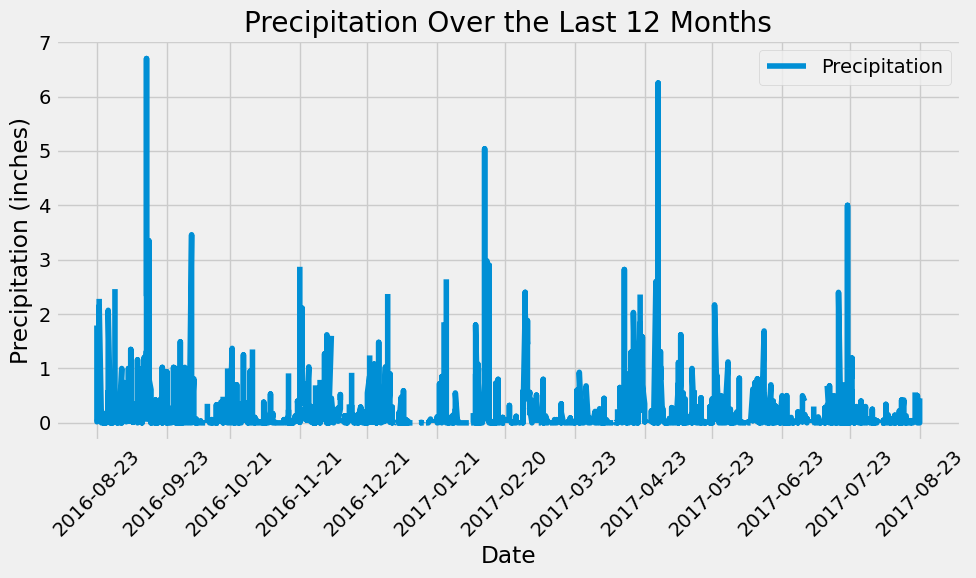

In [18]:
#filter to go between those 2 dates
#filtered_df = df_sorted[(df_sorted['Date'] >= start_date) & (df_sorted['Date'] <= most_recent_date)]
#change 'Date'

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(precip_df['Date'], precip_df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Over the Last 12 Months')
plt.xticks(rotation=45)

#Annotate start and end dates

#extra date formatting
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Set the major locator to show every 6 weeks
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=6))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gcf().autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()

#figure out how to fix the dates

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precip_df['Precipitation'].describe()
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
#my note: importing distinct to count unique stations
from sqlalchemy import distinct
total_stations = session.query(func.count(distinct(station_table.station))).scalar()
print(total_stations)

9


In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Design a query to find the most active stations
most_active_stations = session.query(measurement_table.station, func.count(measurement_table.station))\
                              .group_by(measurement_table.station)\
                              .order_by(func.count(measurement_table.station).desc())\
                              .all()

# Print the stations and their counts in descending order
for station, count in most_active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Extract the most active station ID from the previous query
most_active_station_id = most_active_stations[0][0]

# Calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(measurement_table.tobs), 
                                  func.max(measurement_table.tobs), 
                                  func.avg(measurement_table.tobs))\
                            .filter(measurement_table.station == most_active_station_id)\
                            .all()

# Print the temperature statistics
print(temperature_stats[0][0], temperature_stats[0][1], temperature_stats[0][2])

54.0 85.0 71.66378066378067


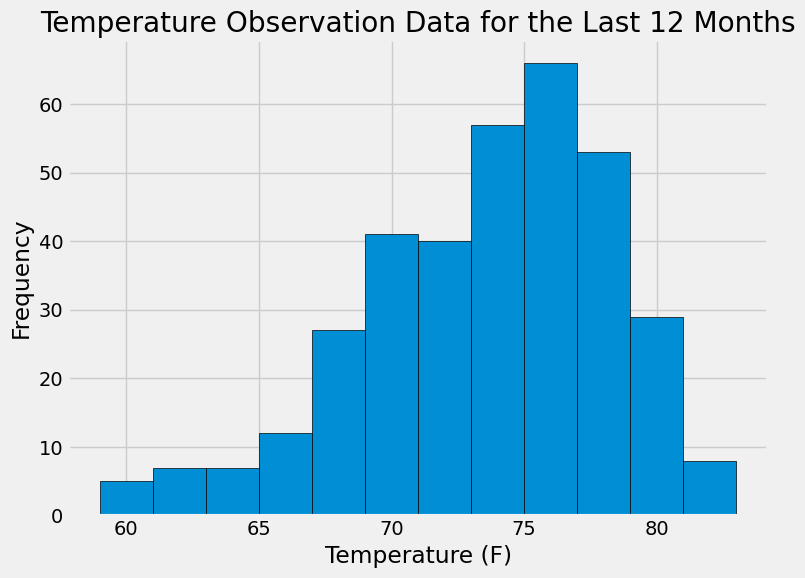

In [25]:
#start_date = dt(2016, 8, 23)
#most_recent_date = dt(2017, 8, 23)

start_date_str = start_date.strftime('%Y-%m-%d')
#most_recent_date_str = most_recent_date.strftime('%Y-%m-%d')

results = session.query(measurement_table.tobs)\
                 .filter(measurement_table.station == most_active_station_id)\
                 .filter(measurement_table.date >= start_date)\
                 .all()

# Extract temperatures from the query results
temperatures = [result[0] for result in results]

# Plot the results as a histogram with bins=12
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, edgecolor='black')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data for the Last 12 Months')
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()